In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Nuevos objetos Antecedente / Consecuentes contienen variables de universo y 
# funciones de pertenencia.
edad = ctrl.Antecedent(np.arange(18, 71, 1), 'edad')
manejo = ctrl.Antecedent(np.arange(0, 101, 1), 'manejo')
riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')

# Población función Auto-pertenencia es posible con .automf (3, 5 o 7) 
#calidad.automf(3)
#servicio.automf(3)

riesgo['bajo'] = fuzz.trimf(riesgo.universe, [0, 10, 20])
riesgo['medio'] = fuzz.trimf(riesgo.universe, [10, 30, 45])
riesgo['alto'] = fuzz.trimf(riesgo.universe, [40, 55, 100])

manejo['bajo'] = fuzz.trimf(manejo.universe, [0, 10, 20])
manejo['medio'] = fuzz.trimf(manejo.universe, [10, 40, 60])
manejo['alto'] = fuzz.trimf(manejo.universe, [50, 70, 100])

edad['joven'] = fuzz.trimf(edad.universe, [18, 25, 30])
edad['adulto'] = fuzz.trimf(edad.universe, [20, 35, 50])
edad['mayor'] = fuzz.trimf(edad.universe, [40, 60, 70])

In [ ]:
edad.view()

In [ ]:
manejo.view()

In [ ]:
riesgo.view()

In [2]:
regla1 = ctrl.Rule(manejo['bajo'] and edad['joven'], riesgo['medio'])
regla2 = ctrl.Rule(manejo['medio'] and edad['joven'], riesgo['alto'])
regla3 = ctrl.Rule(manejo['alto'] and edad['joven'], riesgo['alto'])

regla4 = ctrl.Rule(manejo['bajo'] and edad['adulto'], riesgo['bajo'])
regla5 = ctrl.Rule(manejo['medio'] and edad['adulto'], riesgo['medio'])
regla6 = ctrl.Rule(manejo['alto'] and edad['adulto'], riesgo['alto'])

regla7 = ctrl.Rule(manejo['bajo'] and edad['mayor'], riesgo['medio'])
regla8 = ctrl.Rule(manejo['medio'] and edad['mayor'], riesgo['alto'])
regla9 = ctrl.Rule(manejo['alto'] and edad['mayor'], riesgo['alto'])

regla10 = ctrl.Rule(edad['joven'] and manejo['bajo'], riesgo['medio'])
regla11 = ctrl.Rule(edad['joven'] and manejo['medio'], riesgo['alto'])
regla12 = ctrl.Rule(edad['joven'] and manejo['alto'], riesgo['alto'])

regla13 = ctrl.Rule(edad['adulto'] and manejo['bajo'], riesgo['bajo'])
regla14 = ctrl.Rule(edad['adulto'] and manejo['medio'], riesgo['medio'])
regla15 = ctrl.Rule(edad['adulto'] and manejo['alto'], riesgo['alto'])

regla16 = ctrl.Rule(edad['mayor'] and manejo['bajo'], riesgo['medio'])
regla17 = ctrl.Rule(edad['mayor'] and manejo['medio'], riesgo['alto'])
regla18 = ctrl.Rule(edad['mayor'] and manejo['alto'], riesgo['alto'])

In [3]:
riesgo_ctrl = ctrl.ControlSystem([regla1,regla2,regla3,regla4,regla5,regla6,regla7,regla8,regla9
                                 ,regla10,regla11,regla12,regla13,regla14,regla15,regla16,regla17,regla18])

In [4]:
riesgos = ctrl.ControlSystemSimulation(riesgo_ctrl)

In [5]:
riesgos.input['manejo'] = 50
riesgos.input['edad'] = 25

riesgos.compute()

48.21566063775698


C:\Users\Bryam\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


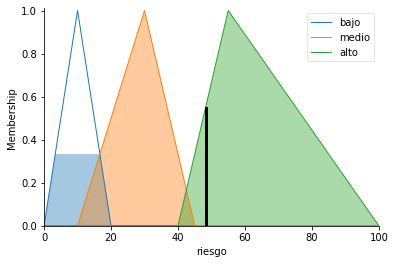

In [6]:
print (riesgos.output['riesgo'])
riesgo.view(sim=riesgos)